# Loading the data

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
attacks = pd.read_csv('data/attacks.csv', encoding='latin-1')
pd.options.display.max_rows = 99
pd.options.display.max_columns = 99

In [3]:
attacks.sample(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
15468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5551,1900.12.27,27-Dec-1900,1900.0,Unprovoked,AUSTRALIA,New South Wales,"Middle Harbour, Sydney",Bathing,Thomas Houstan,M,NaN,FATAL,Y,NaN,NaN,"Taranaki Herald, 12/28/1900",1900.12.27-Houston.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1900.12.27,1900.12.27,752.0,NaN,NaN
3536,1967.01.27,27-Jan-1967,1967.0,Boat,SOUTH AFRICA,Western Cape Province,Melkbosstrand,Fishing for rock lobster,"Lobster boat, occupants: Mr. P. Valentine & Mr...",NaN,NaN,"Holed & sank boat, 1 man flung into water but ...",N,NaN,White shark or thresher shark,GSAF,1967.01.27-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967.01.27,1967.01.27,2767.0,NaN,NaN
11472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,2004.08.00,Aug-2004,2004.0,Boat,SOUTH AFRICA,KwaZulu-Natal,Park Rynie,Fishing,boat x 2,NaN,NaN,No injury to occupants; boat damaged,N,NaN,3 m to 4 m [10' to 13'] white shark,"J. Eager, scubaradio.com",2004.08.00-SAboats.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.08.00,2004.08.00,4655.0,NaN,NaN
13456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Filtering

## Dropping columns with no use & NaN rows

In [4]:
attacks.drop(columns=['Case Number','Location','Name','Injury','Investigator or Source','pdf','href formula',
                      'href','original order','Unnamed: 22', 'Unnamed: 23','Case Number.1',
                      'Case Number.2'], inplace=True)
attacks.dropna(axis='index', how='all', inplace=True)

## Fixing column names

In [5]:
attacks.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Activity', 'Sex ', 'Age',
       'Fatal (Y/N)', 'Time', 'Species '],
      dtype='object')

In [6]:
attacks.columns = ['Date', 'Year', 'Type', 'Country', 'Area', 'Activity',
                   'Sex', 'Age', 'Fatal', 'Time', 'Description']

# Cleaning fields

## Fatal

In [7]:
attacks['Fatal'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
2017          1
y             1
N             1
M             1
Name: Fatal, dtype: int64

In [8]:
attacks['Fatal'] = attacks['Fatal'].str.strip()
attacks['Fatal'] = attacks['Fatal'].str.upper()
attacks['Fatal'].replace(['M','2017'], np.nan, inplace=True)

In [9]:
attacks['Fatal'].replace(['UNKNOWN'], np.nan, inplace=True)
attacks['Fatal'].replace(['N'], 0, inplace=True)
attacks['Fatal'].replace(['Y'], 1, inplace=True)
attacks['Fatal'].value_counts()

0.0    4301
1.0    1389
Name: Fatal, dtype: int64

## Type

In [10]:
attacks['Type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [11]:
attacks['Type'] = attacks['Type'].str.upper()
attacks['Type'].replace('BOAT\w*','BOAT',regex=True,inplace=True)
attacks['Type'].replace('QUESTIONABLE','INVALID',inplace=True)
attacks['Type'].value_counts().head(10)
attacks['Type'].value_counts()

UNPROVOKED      4595
PROVOKED         574
INVALID          549
BOAT             341
SEA DISASTER     239
Name: Type, dtype: int64

## Sex

In [12]:
attacks['Sex'].value_counts()

M      5094
F       637
N         2
M         2
lli       1
.         1
Name: Sex, dtype: int64

In [13]:
attacks['Sex'] = attacks['Sex'].str.strip()
attacks['Sex'].replace(['N','.','lli'],np.nan,inplace=True)
attacks['Sex'].value_counts()

M    5096
F     637
Name: Sex, dtype: int64

## Age

In [14]:
attacks['Age'].value_counts().sample(20)

84                          1
53                         13
37, 67, 35, 27,  ? & 27     1
?    &   14                 1
Ca. 33                      1
30 or 36                    1
1                           2
2 to 3 months               1
61                         13
28                         80
55                         23
7 or 8                      2
9 months                    1
32 & 30                     1
64                          4
68                          7
23 & 20                     1
6                          14
13 or 14                    1
36 & 26                     1
Name: Age, dtype: int64

In [15]:
attacks['Age'].replace(to_replace=['Teen','teen'],value='16',inplace=True)
attacks['Age'].replace(to_replace='30s',value='35',inplace=True)
attacks['Age'].replace(to_replace='20s',value='25',inplace=True)
attacks['Age'] = pd.to_numeric(attacks['Age'], errors='coerce', downcast='integer')
attacks['Age'].value_counts().head(20)

17.0    154
16.0    152
18.0    150
20.0    142
19.0    142
15.0    139
21.0    119
22.0    117
25.0    115
24.0    106
14.0    101
13.0     94
26.0     83
28.0     81
23.0     80
27.0     78
29.0     78
30.0     77
35.0     76
12.0     73
Name: Age, dtype: int64

## Activity

In [16]:
attacks['Activity'] = attacks['Activity'].str.strip()
attacks['Activity'] = attacks['Activity'].str.upper()
attacks['Activity'].value_counts().head(20)

SURFING            976
SWIMMING           916
FISHING            444
SPEARFISHING       340
BATHING            165
WADING             149
DIVING             130
STANDING           101
SCUBA DIVING        91
SNORKELING          89
BODY BOARDING       65
BODY SURFING        50
BOOGIE BOARDING     45
KAYAKING            35
FELL OVERBOARD      33
PEARL DIVING        32
TREADING WATER      32
FREE DIVING         30
WINDSURFING         19
SURF SKIING         19
Name: Activity, dtype: int64

In [17]:
attacks['Activity'].replace(['JUMPING','STANDING','WADING','WALKING','PLAYING','SPLASHING','DANGLING FEET IN THE WATER'],'BATHING',inplace=True)
attacks['Activity'].replace(['BODY SURFING','BOOGIE BOARDING','BODY-BOARDING'],'BODY BOARDING',inplace=True)
attacks['Activity'].replace('.*SPEARFISHING.*','SPEARFISHING',regex=True,inplace=True)
attacks['Activity'].replace('.*DIVING.*','DIVING',regex=True,inplace=True)
attacks['Activity'].replace(['.*SURFING','KITE BOARDING','.*SKIING'],'SURFING',regex=True,inplace=True)
attacks['Activity'].replace(['.*KAYAK.*','.*BOAT.*','CANOEING','ROWING','SAILING','FISHING FOR MACKEREL'],'ON BOAT',regex=True,inplace=True)
attacks['Activity'].replace(['TREADING WATER','FLOATING ON HIS BACK'],'FLOATING',inplace=True)
attacks['Activity'].replace(['.*OVERBOARD.*','JUMPED INTO THE WATER'],'FELL INTO THE WATER',regex=True,inplace=True)
attacks['Activity'].replace('FREEDOM SWIMMING','SWIMMING',inplace=True)
attacks['Activity'].replace('SURF FISHING','WADE FISHING',inplace=True)
attacks['Activity'].replace(['SITTING ON SURFBOARD','SURFING (SITTING ON HIS BOARD)','PADDLE BOARDING','STAND-UP PADDLEBOARDING','PADDLING ON SURFBOARD'],'ON SURFBOARD',inplace=True)
attacks['Activity'].replace(['.{,30} SHARK.','SHARK RELATED ACTIVITY.*'],'SHARK RELATED ACTIVITY',regex=True,inplace=True)

In [18]:
mask = attacks['Activity'].value_counts().loc[attacks['Activity'].value_counts() < 5].index
attacks.loc[attacks['Activity'].isin(mask),'Activity'] = 'OTHER'
attacks['Activity'].value_counts().head(30)

SURFING                   1078
OTHER                      995
SWIMMING                   925
DIVING                     535
BATHING                    455
FISHING                    444
SPEARFISHING               432
ON BOAT                    276
BODY BOARDING              164
FELL INTO THE WATER        115
SHARK RELATED ACTIVITY     100
SNORKELING                  89
FLOATING                    54
ON SURFBOARD                35
WADE FISHING                19
SHARK FISHING               16
SEA DISASTER                14
SHIPWRECK                    6
MURDER                       6
Name: Activity, dtype: int64

## Description/Species

In [19]:
attacks['Description'] = attacks['Description'].str.upper()
attacks['Description'].replace(['.*UNCONFIRMED.*','.* NOT CONFIRMED.*',
                                '.*QUESTIONABLE.*', '.*FOOT SHARK.*',
                                '.*SMALL SHARK.*', '.*FROM SHARK.*',
                                '.*FEMALE SHARK.*', '.*LARGE SHARK.*',
                                '.*BUT SHARK.*', '.*JUVENILE SHARK.*',
                                '.*THE SHARK.*','.*TWO SHARK.*',
                                '.*ANOTHER SHARK.*','.*KG SHARK.*',
                                '.*SEVERAL SHARK.*','.*SAME SHARK.*',
                                '.*GROUND SHARK.*'],
                               np.nan,regex=True,inplace=True)

In [20]:
attacks['Species'] = attacks[attacks['Description'].notnull()]['Description'].str.findall('\w{3,} SHARK')
attacks['Species'] = attacks['Species'].apply(lambda x : ' OR '.join(x) if x == x else x)

In [21]:
attacks.loc[attacks['Species'] == attacks['Species'], 'Species']
attacks.loc[attacks['Species'].notnull() & attacks['Species'].str.contains(' OR '),'Species'] = np.nan
attacks.loc[attacks['Species'] == '','Species'] = np.nan

In [22]:
attacks.drop(columns=['Description'], inplace=True)
attacks['Species'].value_counts().head(40)

WHITE SHARK          623
TIGER SHARK          258
BULL SHARK           170
NURSE SHARK           96
WHALER SHARK          66
REEF SHARK            64
BLACKTIP SHARK        60
MAKO SHARK            52
WOBBEGONG SHARK       46
HAMMERHEAD SHARK      43
SPINNER SHARK         43
RAGGEDTOOTH SHARK     43
BLUE SHARK            38
LEMON SHARK           33
ZAMBESI SHARK         29
WHITETIP SHARK        23
SANDTIGER SHARK       20
SAND SHARK            16
DUSKY SHARK           12
SEVENGILL SHARK       11
CARPET SHARK           8
BASKING SHARK          7
GILL SHARK             7
GALAPAGOS SHARK        7
ANGEL SHARK            6
DOG SHARK              6
COLORED SHARK          6
PORBEAGLE SHARK        6
SANDBAR SHARK          5
COPPER SHARK           5
SILKY SHARK            4
BROWN SHARK            4
THRESHER SHARK         3
WHALE SHARK            3
ZAMBEZI SHARK          3
SALMON SHARK           3
GOBLIN SHARK           2
CAPTIVE SHARK          2
SILVERTIP SHARK        2
COW SHARK              2


## Year

In [23]:
attacks[attacks['Year'].notnull()]['Year'].value_counts().head(10)

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
0.0       125
2008.0    122
2013.0    122
2009.0    120
2012.0    117
Name: Year, dtype: int64

In [24]:
attacks['Year'].replace(0,np.nan,inplace=True)
attacks['Year'] = pd.to_numeric(attacks['Year'], errors='coerce', downcast='integer')
attacks['Year'].value_counts().head(10)

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
2008.0    122
2013.0    122
2009.0    120
2012.0    117
2007.0    112
Name: Year, dtype: int64

## Date

In [25]:
attacks['Date'].sample(20)

4695    13-Nov-1942
2529    15-Oct-1992
4884    19-Mar-1936
1590    02-May-2005
1208    06-Sep-2008
5771    09-Apr-1885
3259    16-Aug-1974
6294    Before 1906
5542    01-Dec-1901
2340    19-Sep-1995
4219           1957
2357    15-Aug-1995
6107      Ca . 1825
4306    01-Feb-1955
1608    05-Mar-2005
2779    08-May-1987
3999    12-Apr-1960
6120    15-Sep-1810
1016    02-Jul-2010
3971    22-Aug-1960
Name: Date, dtype: object

In [26]:
attacks['Date'] = attacks['Date'].str.upper()
attacks['Date'] = attacks['Date'].str.lstrip('REPORTED ')
attacks['Date'] = pd.to_datetime(attacks['Date'],errors='coerce', format='%d-%b-%Y')

In [27]:
attacks.loc[attacks['Date'].notnull(),'Date'].sample(20)

5524   1903-01-10
3146   1977-06-06
4302   1955-02-10
2450   1994-02-13
2388   1995-05-18
6008   1853-07-13
1054   2010-01-09
1151   2009-03-02
2331   1995-11-25
4732   1941-12-03
248    2016-07-14
4569   1947-10-10
5528   1902-11-10
424    2015-05-15
3184   1976-06-01
209    2016-10-02
3593   1966-01-10
1974   2001-02-26
3268   1974-04-20
1394   2007-03-22
Name: Date, dtype: datetime64[ns]

## Time

In [28]:
attacks['Time'] = attacks['Time'].str.strip()
attacks['Time'] = attacks['Time'].str.lower()
attacks.loc[attacks['Time'].notnull(),'Time'].sample(20)

1942    shortly before 13h00
1907                   18h00
416                    10h50
863                    10h00
489                    17h20
121                    15h30
1387                   12h30
857                afternoon
3512                   14h30
3460                   17h00
1620                   13h00
5934                   09h00
1588                   11h00
2992          prior to 10h37
2891                   18h00
3807                   16h30
921                   midday
5952                 evening
154                afternoon
2954                   18h15
Name: Time, dtype: object

In [29]:
attacks.loc[(attacks['Time'].notnull()) & (attacks['Time'].str.fullmatch('[a-zA-Z]{3,}')),'Time'].value_counts()

afternoon    187
morning      122
night         63
evening       34
dusk          16
midday        10
sunset         4
midnight       4
dawn           2
dark           2
lunchtime      1
daybreak       1
nightfall      1
noon           1
daytime        1
Name: Time, dtype: int64

In [30]:
attacks['Time'].replace(['.*evening.*','.*dusk.*',
                         '.*dark.*','.*night.*'],'night',regex=True,inplace=True)

attacks['Time'].replace(['pm','p\.m\.','.*midday.*','.*sunset.*','.*lunchtime.*',
                         '.*noon.*','.*daytime.*','.*afternoon.*'],'afternoon',regex=True,inplace=True)

attacks['Time'].replace(['a\.m\.''am','.*dawn.*',
                         '.*daybreak.*','.*morning.*'],'day-morning',regex=True,inplace=True)

In [31]:
attacks.loc[(attacks['Time'].notnull()) & (attacks['Time'].str.fullmatch('\w{3,}')),'Time'].value_counts()

afternoon    271
night        131
11h00        128
12h00        109
15h00        108
            ... 
11h58          1
12h46          1
12h55          1
01h30          1
06h10          1
Name: Time, Length: 252, dtype: int64

In [32]:
#grouping 06:00 to 11:59 as day-morning because english is weird
attacks['Time'].replace(to_replace='.*0[6-9].?\d{2}.*',value='day-morning',regex=True,inplace=True)
attacks['Time'].replace(to_replace='.*1[0-1].?\d{2}.*',value='day-morning',regex=True,inplace=True)
#grouping 12:00 to 17:59 as afternoon
attacks['Time'].replace(to_replace='.*1[2-7].?\d{2}.*',value='afternoon',regex=True,inplace=True)
#grouping 18:00 to 23:59 as night
attacks['Time'].replace(to_replace='.*1[8-9].?\d{2}.*',value='night',regex=True,inplace=True)
attacks['Time'].replace(to_replace='.*2[0-3].?\d{2}.*',value='night',regex=True,inplace=True)
#grouping 00:00 to 05:59 as night-morning because english is weird
attacks['Time'].replace(to_replace='.*0[0-5].?\d{2}.*',value='night-morning',regex=True,inplace=True)

In [33]:
attacks[~attacks['Time'].isin(['day-morning','night-morning','night','afternoon'])]['Time'].count()

32

In [34]:
attacks.loc[~attacks['Time'].isin(['day-morning','night-morning','night','afternoon']),'Time'] = np.nan

In [35]:
attacks['Time'].value_counts(dropna=False)

NaN              3386
afternoon        1593
day-morning       923
night             359
night-morning      41
Name: Time, dtype: int64

## Country

In [36]:
attacks['Country'].value_counts().head(20)

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
PHILIPPINES           61
REUNION               60
NEW CALEDONIA         53
CUBA                  46
MOZAMBIQUE            45
SPAIN                 44
INDIA                 40
EGYPT                 38
JAPAN                 34
CROATIA               34
Name: Country, dtype: int64

In [37]:
attacks['Country'] = attacks['Country'].str.strip()
attacks['Country'] = attacks['Country'].str.upper()
attacks['Country'].replace(to_replace=['.*OCEAN','.* SEA'],value=np.nan,regex=True,inplace=True)
attacks['Country'].replace(['BETWEEN PORTUGAL & INDIA','IRAN / IRAQ','EGYPT / ISRAEL','RED SEA?'],np.nan,inplace=True)
attacks['Country'].replace('EQUATORIAL GUINEA / CAMEROON','EQUATORIAL GUINEA',inplace=True)
attacks['Country'].replace('CEYLON (SRI LANKA)','SRI LANKA',inplace=True)
attacks['Country'].replace('UNITED ARAB EMIRATES (UAE)','UNITED ARAB EMIRATES',inplace=True)
attacks['Country'].value_counts().head(20)

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                90
ITALY                 71
FIJI                  65
PHILIPPINES           62
REUNION               60
NEW CALEDONIA         53
CUBA                  46
MOZAMBIQUE            45
SPAIN                 44
INDIA                 40
EGYPT                 40
JAPAN                 34
CROATIA               34
Name: Country, dtype: int64

## Area

In [38]:
attacks['Area'] = attacks['Area'].str.strip()
attacks['Area'] = attacks['Area'].str.upper()
attacks['Area'].value_counts().head(50)

FLORIDA                         1038
NEW SOUTH WALES                  486
QUEENSLAND                       312
HAWAII                           298
CALIFORNIA                       290
KWAZULU-NATAL                    213
WESTERN CAPE PROVINCE            195
WESTERN AUSTRALIA                189
SOUTH CAROLINA                   161
EASTERN CAPE PROVINCE            160
SOUTH AUSTRALIA                  104
NORTH CAROLINA                   104
VICTORIA                          92
PERNAMBUCO                        74
TEXAS                             73
TORRES STRAIT                     72
NORTH ISLAND                      67
NEW JERSEY                        53
TASMANIA                          41
SOUTH ISLAND                      40
NEW YORK                          33
OREGON                            29
NORTHERN TERRITORY                23
ABACO ISLANDS                     23
CENTRAL PROVINCE                  22
VIRGINIA                          19
HAVANA PROVINCE                   19
V

# Adding temperature by country

## Add new dataset with temperatures by country

In [39]:
#dataset download: https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities
temperatures = pd.read_csv('data/city_temperature.csv',
                           dtype={'Region': str, 'Country': str, 'State': str, 'City': str, 'Year': np.int32, 'Month': np.int32, 'Day': np.int32, 'AvgTemperature': np.float64})
temperatures['Country'] = temperatures['Country'].str.upper()
temperatures['Country'] = temperatures['Country'].str.strip()
temperatures['Country'].replace('US','USA',inplace=True)
temperatures['AvgTemperature'].replace(-99,np.nan,inplace=True) #nulls come as -99
temperatures['AvgTemperature'] = (temperatures['AvgTemperature'] - 30) / 2 #convert to celsius
temperatures

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,ALGERIA,NaN,Algiers,1,1,1995,17.10
1,Africa,ALGERIA,NaN,Algiers,1,2,1995,9.70
2,Africa,ALGERIA,NaN,Algiers,1,3,1995,9.40
3,Africa,ALGERIA,NaN,Algiers,1,4,1995,8.20
4,Africa,ALGERIA,NaN,Algiers,1,5,1995,8.95
...,...,...,...,...,...,...,...,...
2906322,North America,USA,Additional Territories,San Juan Puerto Rico,7,27,2013,26.20
2906323,North America,USA,Additional Territories,San Juan Puerto Rico,7,28,2013,25.80
2906324,North America,USA,Additional Territories,San Juan Puerto Rico,7,29,2013,27.10
2906325,North America,USA,Additional Territories,San Juan Puerto Rico,7,30,2013,26.90


## Aggregating temperatures by country and year

In [40]:
temps = temperatures.groupby(['Country','Year'],as_index=False).agg(avg_temp = ('AvgTemperature','mean'), median_temp = ('AvgTemperature', 'median'), max_temp = ('AvgTemperature', 'max'))
temps.to_csv('data/temps.csv')

## Merging both datasets

In [41]:
attacks_country_temp = pd.merge(attacks,temps,on=['Country','Year'],how='left')

# Conclusions

In [42]:
#full_report = ProfileReport(attacks_country_temp)
#full_report.to_file('reports/full_report.html')

In [43]:
attacks_by_cy = attacks_country_temp[attacks_country_temp['avg_temp'].notnull()].groupby(['Country','Year','max_temp','median_temp','avg_temp'],
                                                                           as_index=False).agg(number = ('max_temp', 'count'))

## Correlation by temperature and year

In [44]:
attacks_by_cy.corr().iloc[:5,:4]

,Year,max_temp,median_temp,avg_temp
Year,1.000000,0.087513,0.084496,0.088113
max_temp,0.087513,1.000000,0.198585,0.153631
median_temp,0.084496,0.198585,1.000000,0.993841
avg_temp,0.088113,0.153631,0.993841,1.000000
number,0.020974,0.578751,-0.322988,-0.367387


### USA

In [45]:
attacks_by_cy[attacks_by_cy['Country'] == 'USA'].corr().iloc[:5,:4]

,Year,max_temp,median_temp,avg_temp
Year,1.000000,0.453210,0.611918,0.415605
max_temp,0.453210,1.000000,0.452817,0.347630
median_temp,0.611918,0.452817,1.000000,0.810382
avg_temp,0.415605,0.347630,0.810382,1.000000
number,0.376775,0.402628,0.497183,0.277862


### Australia

In [46]:
attacks_by_cy[attacks_by_cy['Country'] == 'AUSTRALIA'].corr().iloc[:5,:4]

,Year,max_temp,median_temp,avg_temp
Year,1.000000,0.305441,0.807577,0.804839
max_temp,0.305441,1.000000,0.392914,0.399139
median_temp,0.807577,0.392914,1.000000,0.960049
avg_temp,0.804839,0.399139,0.960049,1.000000
number,0.841498,0.459499,0.670071,0.665683


### South Africa

In [47]:
attacks_by_cy[attacks_by_cy['Country'] == 'SOUTH AFRICA'].corr().iloc[:5,:4]

,Year,max_temp,median_temp,avg_temp
Year,1.000000,0.674573,0.587306,0.711466
max_temp,0.674573,1.000000,0.472851,0.653795
median_temp,0.587306,0.472851,1.000000,0.863464
avg_temp,0.711466,0.653795,0.863464,1.000000
number,0.043982,0.232161,0.109889,0.117747


## Numbers

### By country

In [48]:
attacks_by_country = attacks_country_temp['Country'].value_counts().to_frame().reset_index()
attacks_by_country.columns = ['name','attacks']
attacks_by_country['name'].replace('USA','UNITED STATES OF AMERICA',inplace=True)
attacks_by_country.head(10)

,name,attacks
0,UNITED STATES OF AMERICA,2229
1,AUSTRALIA,1338
2,SOUTH AFRICA,579
3,PAPUA NEW GUINEA,134
4,NEW ZEALAND,128
5,BRAZIL,112
6,BAHAMAS,109
7,MEXICO,90
8,ITALY,71
9,FIJI,65


In [49]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['name'] = world['name'].str.upper()
world_attacks = pd.merge(world,attacks_by_country,on=['name'],how='left')

In [50]:
world_attacks['attacks'].replace(np.nan,0,inplace=True)

<AxesSubplot:>

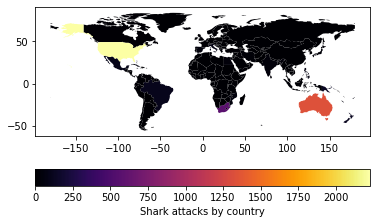

In [51]:
fig, ax = plt.subplots(1, 1)
world_attacks.plot(column='attacks',
           ax=ax,
           legend=True,cmap='inferno',
           legend_kwds={'label': "Shark attacks by country",
                        'orientation': "horizontal"},figsize=(15, 10))

<AxesSubplot:>

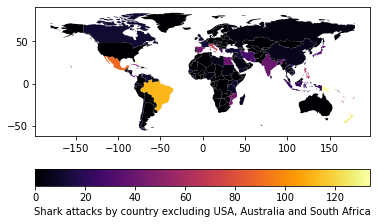

In [52]:
wa_minus_top3 = world_attacks.copy()
wa_minus_top3.loc[wa_minus_top3['name'].isin(['UNITED STATES OF AMERICA','AUSTRALIA','SOUTH AFRICA']),'attacks'] = 0
fig, ax = plt.subplots(1, 1)
wa_minus_top3.plot(column='attacks',
           ax=ax,
           legend=True,cmap='inferno',figsize=(15, 10),
           legend_kwds={'label': "Shark attacks by country excluding USA, Australia and South Africa",
                        'orientation': "horizontal"})

### By sex

In [53]:
attacks_country_temp[attacks_country_temp['Sex'].notnull()].shape[0]

5733

<AxesSubplot:ylabel='Sex'>

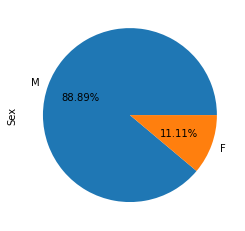

In [54]:
attacks_by_sex = attacks_country_temp['Sex'].value_counts(normalize=True)*100
attacks_by_sex.plot.pie(autopct='%1.2f%%')

### By age

<AxesSubplot:>

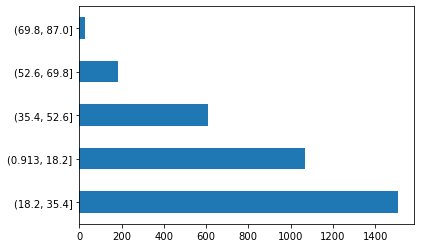

In [55]:
attacks_country_temp['Age'].value_counts(bins=5).plot(kind='barh')

### By activity

<AxesSubplot:>

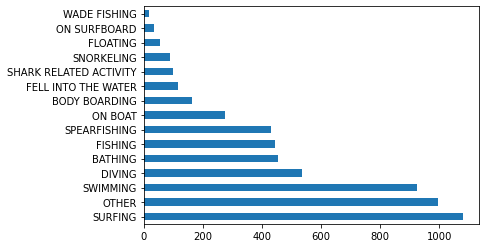

In [56]:
attacks_country_temp['Activity'].value_counts().head(15).plot(kind='barh')

/Users/elros/miniconda3/envs/ds/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/elros/miniconda3/envs/ds/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/elros/miniconda3/envs/ds/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/elros/miniconda3/envs/ds/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


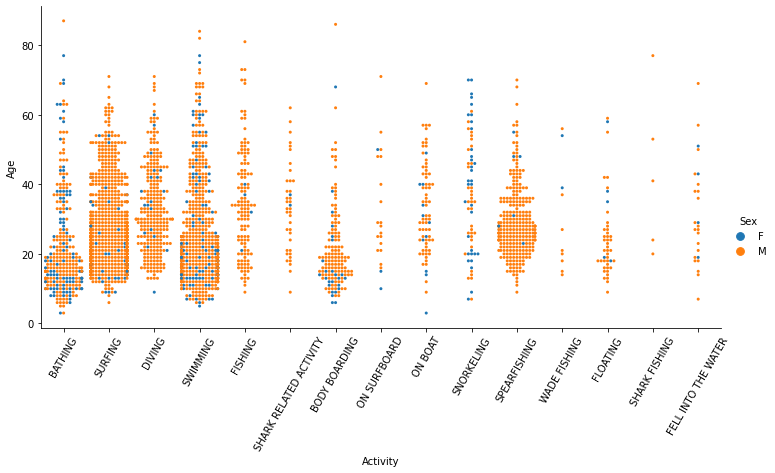

In [67]:
activities = attacks_country_temp.loc[~attacks_country_temp['Activity'].isin(['OTHER','SHIPWRECK','PADDLESKIING','MURDER',
                                                                              'SEA DISASTER']),['Age','Activity','Sex']].copy()
sns.catplot(x="Activity", y="Age", hue="Sex", kind="swarm", height=5,aspect=2,s=3, data=activities).set_xticklabels(rotation=60)

### Type

<AxesSubplot:ylabel='Type'>

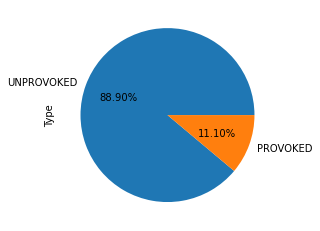

In [57]:
attacks_country_temp['Type'].value_counts().head(2).plot.pie(autopct='%1.2f%%')

### By fatality

In [58]:
attacks_country_temp[attacks_country_temp['Fatal'].notnull()].shape[0]

5690

<AxesSubplot:ylabel='Fatal'>

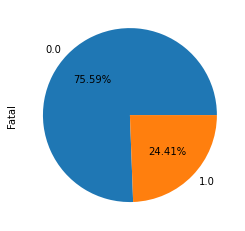

In [59]:
attacks_by_sex = attacks_country_temp['Fatal'].value_counts(normalize=True)*100
attacks_by_sex.plot.pie(autopct='%1.2f%%')

### By species

#### Fatality

In [60]:
fatality_by_species = attacks_country_temp[attacks_country_temp['Species'] != ''].groupby(['Species'],as_index=False).agg(Fatal = ('Fatal','sum'),Total_attacks = ('Species','count')).sort_values('Total_attacks',ascending=False)
fatality_by_species['Non_fatal'] = fatality_by_species['Total_attacks'] - fatality_by_species['Fatal']
fatality_by_species.drop(columns=['Total_attacks'],inplace=True)

<AxesSubplot:xlabel='Species'>

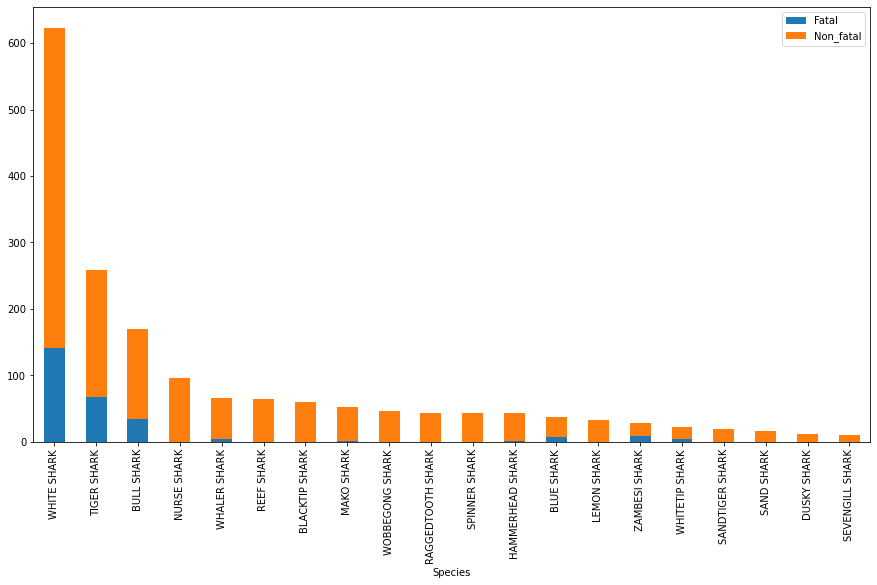

In [61]:
fatality_by_species.head(20).plot(kind='bar',x='Species',stacked=True,figsize=(15,8))

#### White sharks attacks by year

<AxesSubplot:xlabel='Year'>

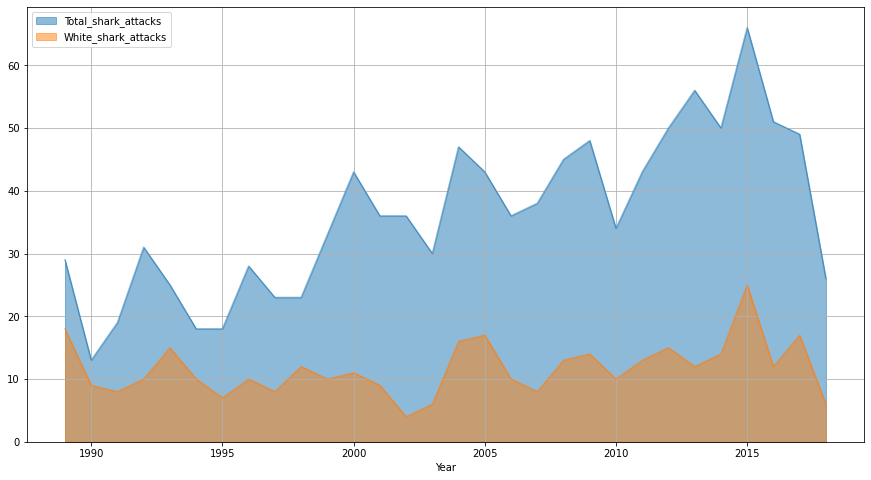

In [62]:
white_shark_attacks = attacks_country_temp[attacks_country_temp['Species'] == 'WHITE SHARK'].groupby(['Year'], as_index=False).agg(White_shark_attacks = ('Species','count')).sort_values(by='Year',ascending=False)
total_attacks = attacks_country_temp.groupby(['Year'], as_index=False).agg(Total_shark_attacks = ('Species','count')).sort_values(by='Year',ascending=False)
ws_total_attacks = pd.merge(total_attacks,white_shark_attacks,on=['Year'],how='left')
ws_total_attacks.head(30).plot(kind='area',x='Year',stacked=False,grid=True,figsize=(15,8))